In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 

In [3]:
def loss_function(w, b):
    cost = 0
    for index, row in df.iterrows():
        cost += ((w * row['study_hours_per_day'] + b - row['exam_score']) ** 2)
    cost /= (2*df.shape[0])
    return cost

In [38]:
def gradient_descent_fast(X, y, w, b, alpha):
    n = len(X)
    y_pred = w * X + b
    error = y_pred - y
    
    w_d = (1/n) * np.dot(X, error)
    b_d = (1/n) * np.sum(error)

    
    new_w = w - alpha * w_d
    new_b = b - alpha * b_d
    
    return new_w, new_b

In [18]:
df = pd.read_csv('advertising.csv')
# df = df.sample(n=100, random_state = 1)

In [59]:
steps = 1000
w, w_old = 0, 1
b, b_old = 0, 1
X = df['TV'].values
X_scaled = (X - X.mean()) / X.std()
y = df['Sales'].values
eps = 0.01
alpha = 0.1

w:  4.740481726158123
b:  15.10028926184127


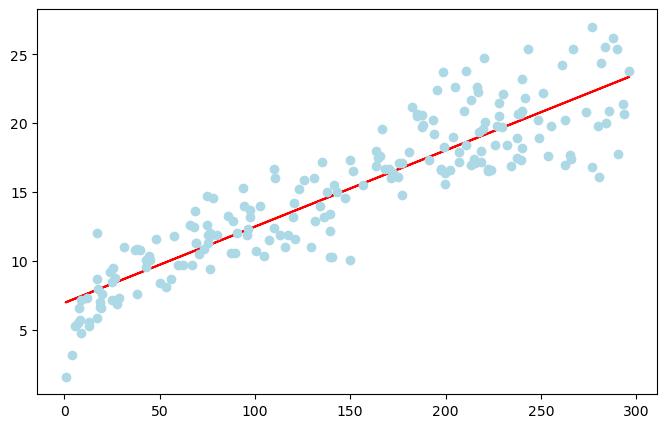

In [73]:
for step in range(steps):
    w_old, b_old = (w, b)
    w, b = gradient_descent_fast(X_scaled, y, w, b, alpha)
    if abs(w - w_old) < eps and abs(b - b_old) < eps:
        break
print("w: ", w)
print("b: ", b)
w_orig = w/X.std()
b_orig = b - (w * X.mean())/X.std()
pred_y = w_orig * X + b_orig
fig, ax = plt.subplots(figsize=(8, 5))


ax.scatter(x=X, y=df['Sales'].values, color='lightblue')
ax.plot(X, pred_y, zorder=-1, color='red')

<Axes: xlabel='TV', ylabel='Sales'>

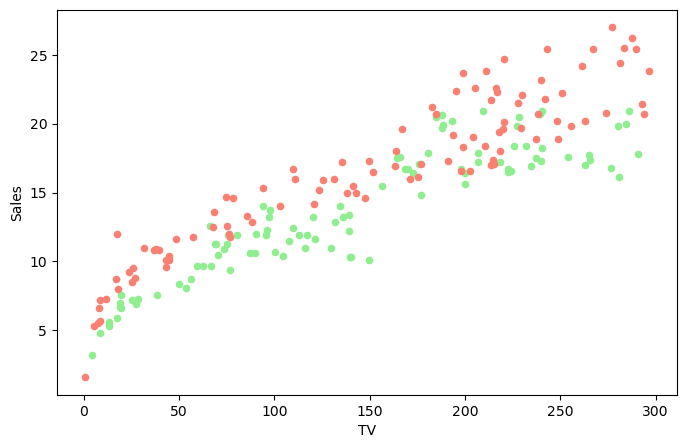

In [84]:
fig, ax = plt.subplots(figsize = (8, 5))
df_smaller = df.loc[
    df['Radio'] < 22
]
df_bigger = df.loc[
    df['Radio'] >= 22
]
df_smaller.plot.scatter(x='TV', y='Sales', color='lightgreen', ax = ax)
df_bigger.plot.scatter(x='TV', y='Sales', color='salmon', ax = ax)

In [86]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

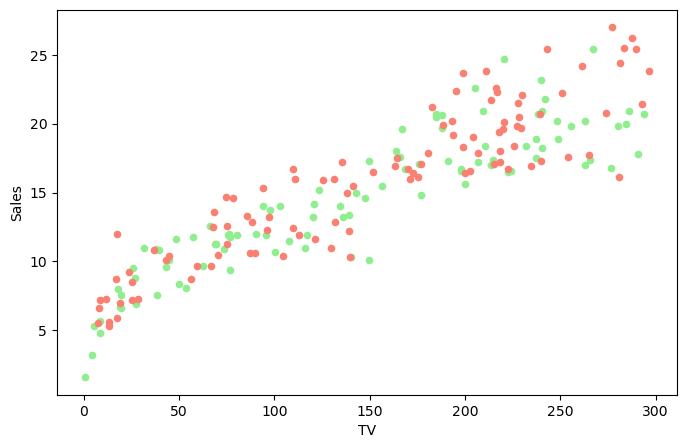

In [87]:
fig, ax = plt.subplots(figsize = (8, 5))
df_smaller = df.loc[
    df['Newspaper'] < 25
]
df_bigger = df.loc[
    df['Newspaper'] >= 25
]
df_smaller.plot.scatter(x='TV', y='Sales', color='lightgreen', ax = ax)
df_bigger.plot.scatter(x='TV', y='Sales', color='salmon', ax = ax)